In [1]:
!pip install ultralytics -q


# Imports

In [12]:
import cv2
import pickle
from ultralytics import YOLO
from IPython.display import display, Image, clear_output,Video
import subprocess


# paths and inits

In [13]:

# kaggle
path='/kaggle/input/barkotel-internship/AI Intern Video Tech Task.mp4'
yolopath='/kaggle/input/yolo-v8-vehicles-detecting-counting/yolov8x.pt'
# path='AI Intern Video Tech Task.mp4'
boxcolor=(0,255,0)
frame_width = 3
top_left=(100,100)
bottom_right=(300,360)
cls=[0]
skip_frames = 10
video=cv2.VideoCapture(path)

In [4]:
# #draw ROI in the video
# frame_count=0
# skip_frames = 10


# while frame_count<10000:
#     for _ in range(skip_frames):
#         ret, _ = video.read()
#         if not ret:
#             break
#     ret,frame=video.read()
#     if not ret:
#         break
    
# #     frame = cv2.resize(frame, (640, 480))
    
#     (rects, weights) = hog.detectMultiScale(frame, winStride=(8, 8), padding=(8, 8), scale=1.05)
#     cv2.rectangle(frame,top_left,bottom_right,boxcolor,frame_width)
#     count=0
#     for (x, y, w, h) in rects:
#     # Define the rectangle (x, y, w, h) coordinates
#         rect_top_left = (x, y)
#         rect_bottom_right = (x + w, y + h)

#         # Check if the rectangle intersects with the region defined by top_left and bottom_right
#         if (rect_bottom_right[0] <= top_left[0] or rect_top_left[0] >= bottom_right[0] or
#             rect_bottom_right[1] <= top_left[1] or rect_top_left[1] >= bottom_right[1]):
#             # No intersection, draw the rectangle
#             cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
#             count += 1

#     cv2.putText(frame, f'People Count:{count}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    

# #     cv2.imshow('frame',frame)
#     #kaggle
#     _, buffer = cv2.imencode('.jpg', frame)
#     img = Image(data=buffer)

#     # Clear the previous output and display the new frame
#     clear_output(wait=True)
#     display(img)

#     frame_count += 1
#     #windows
# #     if cv2.waitKey(1) & 0xFF == ord('q'):
# #         break
# video.release()
# # cv2.destroyAllWindows()

    


# testing yolo

In [5]:
# !pip install ultralytics -q

In [6]:
# frac = 0.65 
# path=''
# display(Video(data=path, height=int(720*frac), width=int(1280*frac)))
model = YOLO('yolov8x.pt')
dict_classes = model.model.names
print(dict_classes)


100%|██████████| 131M/131M [00:00<00:00, 332MB/s] 


{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [7]:
def risize_frame(frame, scale_percent):
    """Function to resize an image in a percent scale"""
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dim = (width, height)

    # resize image
    resized = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    return resized


In [8]:
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = video.get(cv2.CAP_PROP_FPS)
frames=int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print(height, width, fps,frames)


1080 960 11.998961860442657 1988


In [9]:
video_name = 'result.mp4'
output_path = "rep_" + video_name
tmp_output_path = "tmp_" + output_path
VIDEO_CODEC = "MP4V"

output_video = cv2.VideoWriter(tmp_output_path, 
                               cv2.VideoWriter_fourcc(*VIDEO_CODEC), 
                               fps, (width, height))

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


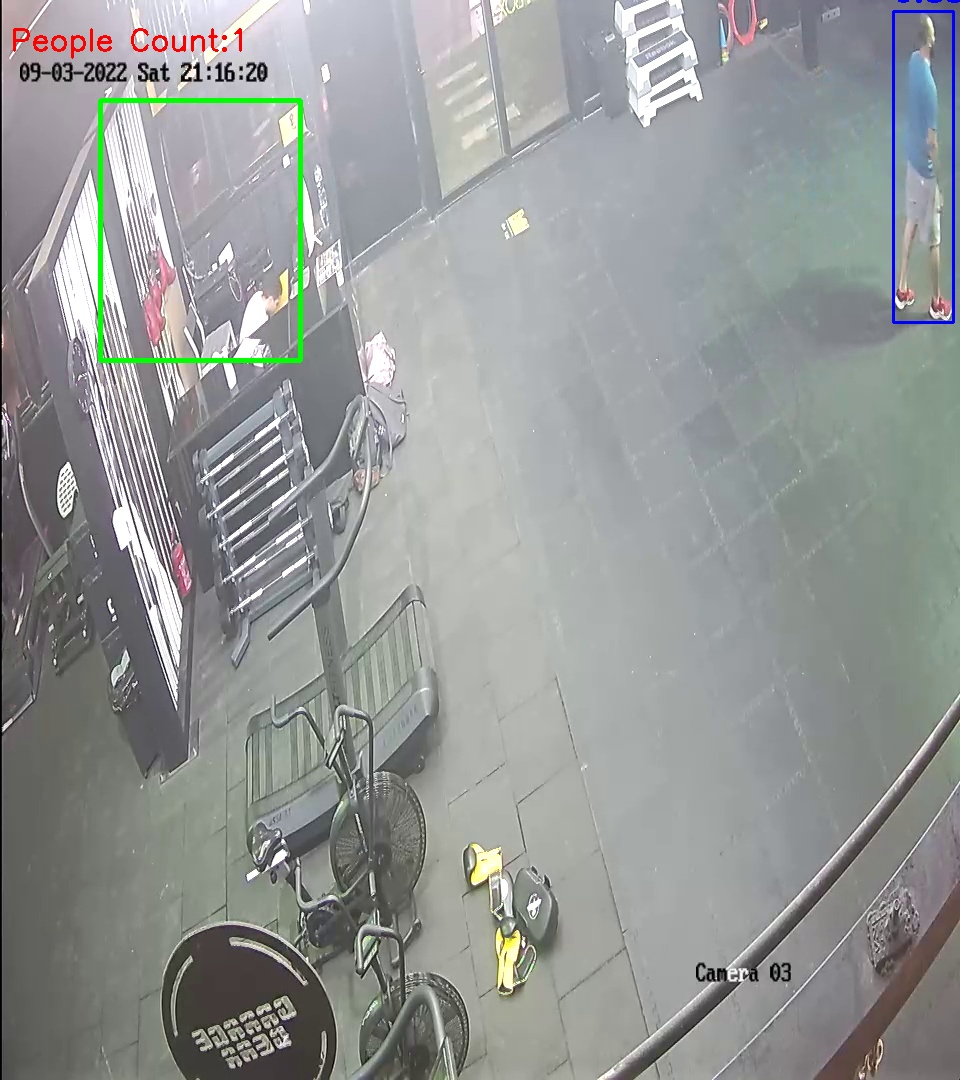

In [14]:
import os
import pandas as pd
import numpy as np
os.environ['CUDA_VISIBLE_DEVICES']= '0'
position_frame_old=None
for i in range(frames):
    
    for _ in range(skip_frames):
        ret, _ = video.read()
        if not ret:
            break
    ret,frame=video.read()
    if not ret:
        break
    


    cv2.rectangle(frame,top_left,bottom_right,boxcolor,frame_width)
        
    y_hat = model.predict(frame, conf = 0.1, classes = cls, device = 0, verbose = False)
#     print("y hat is: ", y_hat)
    boxes   = y_hat[0].boxes.xyxy.cpu().numpy()
    conf    = y_hat[0].boxes.conf.cpu().numpy()
    classes = y_hat[0].boxes.cls.cpu().numpy() 
#     print("classes boxs and conf: ",classes, boxes,conf)
    positions_frame = pd.DataFrame(y_hat[0].cpu().numpy().boxes.data, columns = ['xmin', 'ymin', 'xmax', 'ymax', 'conf', 'class'])
    count=0
    for ix, row in enumerate(positions_frame.iterrows()):
        # Getting the coordinates of each vehicle (row)
        xmin, ymin,xmax , ymax, confidence, category,  = row[1].astype('int')
        if (xmax <= top_left[0] or xmin >= bottom_right[0] or
            ymax <= top_left[1] or ymin >= bottom_right[1]):
            # No intersection, draw the rectangle
            if conf[ix]>0.4:
                cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
                cv2.putText(img=frame, text=str(np.round(conf[ix],2)),
                        org= (xmin,ymin-10), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(255, 0, 0),thickness=2)
                count += 1
        else:
#             tracker.init(frame, bbox)
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (255, 255, 0), 2)
            cv2.putText(img=frame, text='Casheir_'+str(np.round(conf[ix],2)),
                    org= (xmin,ymin-10), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(255, 0, 0),thickness=2)
            
#         cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (255,0,0), 5) # box
        
#         count=count+1
    cv2.putText(frame, f'People Count:{count}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    output_video.write(frame)
    _, buffer = cv2.imencode('.jpg', frame)
    img = Image(data=buffer)

    # Clear the previous output and display the new frame
    clear_output(wait=True)
    display(img)
output_video.release()
if os.path.exists(output_path):
    os.remove(output_path)
subprocess.run(
    ["ffmpeg",  "-i", tmp_output_path,"-crf","18","-preset","veryfast","-hide_banner","-loglevel","error","-vcodec","libx264",output_path])
os.remove(tmp_output_path)
    
    
    

# video extractor

In [ ]:
VIDEO_CODEC = "MP4V"
videoname='result.mp4'
output_video = cv2.VideoWriter(videoname, 
                               cv2.VideoWriter_fourcc(*VIDEO_CODEC), 
                               fps, (width, height))

In [ ]:
config_file = '/kaggle/input/yolo/yolov3.cfg'
weights_file = '/kaggle/input/yolo/yolov3.weights'
classes_file = '/kaggle/input/yolo/coco.names'

net = cv2.dnn.readNet(weights_file, config_file)
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
print(output_layers)